In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
most_recent

('2017-08-23',)

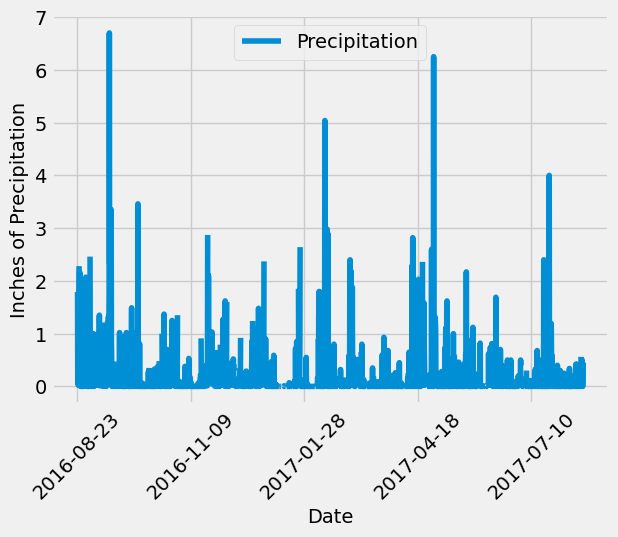

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_prior = (dt.datetime.strptime(str(most_recent), "('%Y-%m-%d',)").date()) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
preciptation = session.query(measurement_table.date, measurement_table.prcp).filter(measurement_table.date >= year_prior).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
preciptation_df = pd.DataFrame(preciptation, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
preciptation_df.sort_values(by = "Date", inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
preciptation_df.plot(x ="Date", y = "Precipitation", ylabel = "Inches of Precipitation")
plt.xticks(rotation = 45)
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
preciptation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station_table.station).distinct().count()
total_stations

9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement_table.station, func.count(measurement_table.station)).\
                    group_by(measurement_table.station).\
                    order_by(func.count(measurement_table.station).desc()).\
                    all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
top_active = most_active[0][0]
top_active

#calculate the lowest, highest, and average temperature.
info = session.query(func.min(measurement_table.tobs), func.max(measurement_table.tobs), func.avg(measurement_table.tobs)).\
       filter(measurement_table.station == top_active).all()
info

[(54.0, 85.0, 71.66378066378067)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(func.min(measurement_table.tobs), func.max(measurement_table.tobs), func.avg(measurement_table.tobs)).\
                            filter(measurement_table.station == most_active[0][0]).\
                            all()

most_active_stats

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temp')

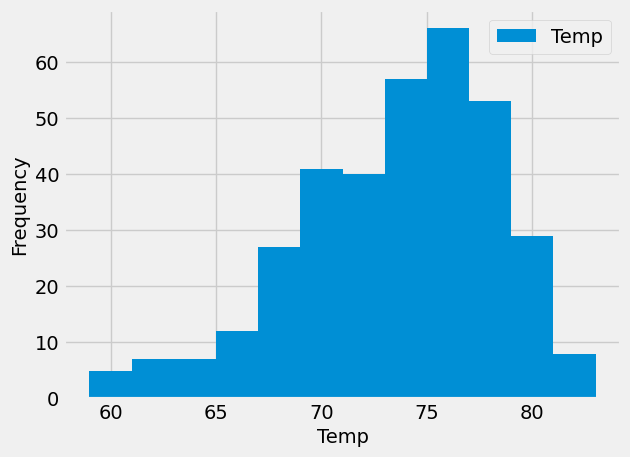

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps = session.query(measurement_table.date, measurement_table.tobs).filter(measurement_table.date >= year_prior).\
                        filter(measurement_table.station == most_active[0][0]).all()

last_year_temps_df = pd.DataFrame(last_year_temps, columns = ["Date", "Temp"])

last_year_temps_df.plot.hist(column = "Temp", bins = 12).set_xlabel('Temp')

# Close Session

In [39]:
# Close Session
session.close()